# UCI - Dataset - Preprocessing

### Import 

In [7]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
    !pip install scikit-learn

^C


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.7 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.3/10.7 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.7 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/10.7 MB 4.0 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/10.7 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.7 MB 4.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.7 MB 3.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.7 MB 3.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.7 MB 3.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.7 MB 3.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/10.7 MB 3.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.7 MB 3.0 MB/s eta 0:00:03
   ---


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Data Fetching and Cleaning

In [5]:
features = []
with open('UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

print('No of Features: {}'.format(len(features)))


No of Features: 561


### Duplicate features:

In [6]:
seen = set()
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen.add(x)
    elif x + 'n' not in seen:
        uniq_features.append(x + 'n')
        seen.add(x + 'n')
    else:
        uniq_features.append(x + 'nn')
        seen.add(x + 'nn')
len(uniq_features)

561

### Obtain the train data

In [9]:
import pandas as pd

# Load feature names (assumes you've already created uniq_features correctly)
# uniq_features = [...]

# ✅ Load the main feature data
X_train = pd.read_csv(
    'UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt',
    delim_whitespace=True,
    header=None,
    names=uniq_features
)

# ✅ Load the subject identifiers as a Series
subject_train = pd.read_csv(
    'UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt',
    header=None
)[0]  # Extract as Series

# ✅ Load activity labels as a Series
y_train = pd.read_csv(
    'UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt',
    header=None
)[0]

# ✅ Map activity numbers to labels
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}
y_train_labels = y_train.map(activity_labels)

# ✅ Add subject and activity info to the feature DataFrame
X_train['subject'] = subject_train
X_train['Activity'] = y_train
X_train['ActivityName'] = y_train_labels

# ✅ Final combined training data
train = X_train

# ✅ Preview sample
train.sample()


C:\Users\HP\AppData\Local\Temp\ipykernel_18924\1061721677.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1214,0.270805,-0.017066,-0.110333,-0.963226,-0.970369,-0.972238,-0.964375,-0.970937,-0.978272,-0.922638,...,0.092131,-0.08071,-0.215048,0.013585,0.623474,-0.697463,-0.301014,6,6,LAYING


In [10]:
train.shape

(7352, 564)

### Obtain the test data

In [13]:
import pandas as pd

# ✅ Load the test feature data
X_test = pd.read_csv(
    'UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt',
    delim_whitespace=True,
    header=None,
    names=uniq_features
)

# ✅ Load subject identifiers as a Series
subject_test = pd.read_csv(
    'UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt',
    header=None
)[0]

# ✅ Load activity labels as a Series
y_test = pd.read_csv(
    'UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt',
    header=None
)[0]

# ✅ Map activity numbers to descriptive names
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}
y_test_labels = y_test.map(activity_labels)

# ✅ Combine all data into a single DataFrame
X_test['subject'] = subject_test
X_test['Activity'] = y_test
X_test['ActivityName'] = y_test_labels

# ✅ Final test DataFrame
test = X_test

# ✅ Preview a random row
test.sample()


C:\Users\HP\AppData\Local\Temp\ipykernel_18924\2664465423.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
797,0.247032,-0.018728,-0.090166,-0.953531,-0.929475,-0.926032,-0.969075,-0.93951,-0.942525,-0.845539,...,0.013856,0.100213,-0.14423,0.181581,-0.151913,0.379455,-0.479695,9,4,SITTING


In [14]:
test.shape

(2947, 564)

### 1. Check for Duplicates

In [15]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


### 2. Checking for NaN/null values

In [16]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


### 3. Check for data imbalance

In [17]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

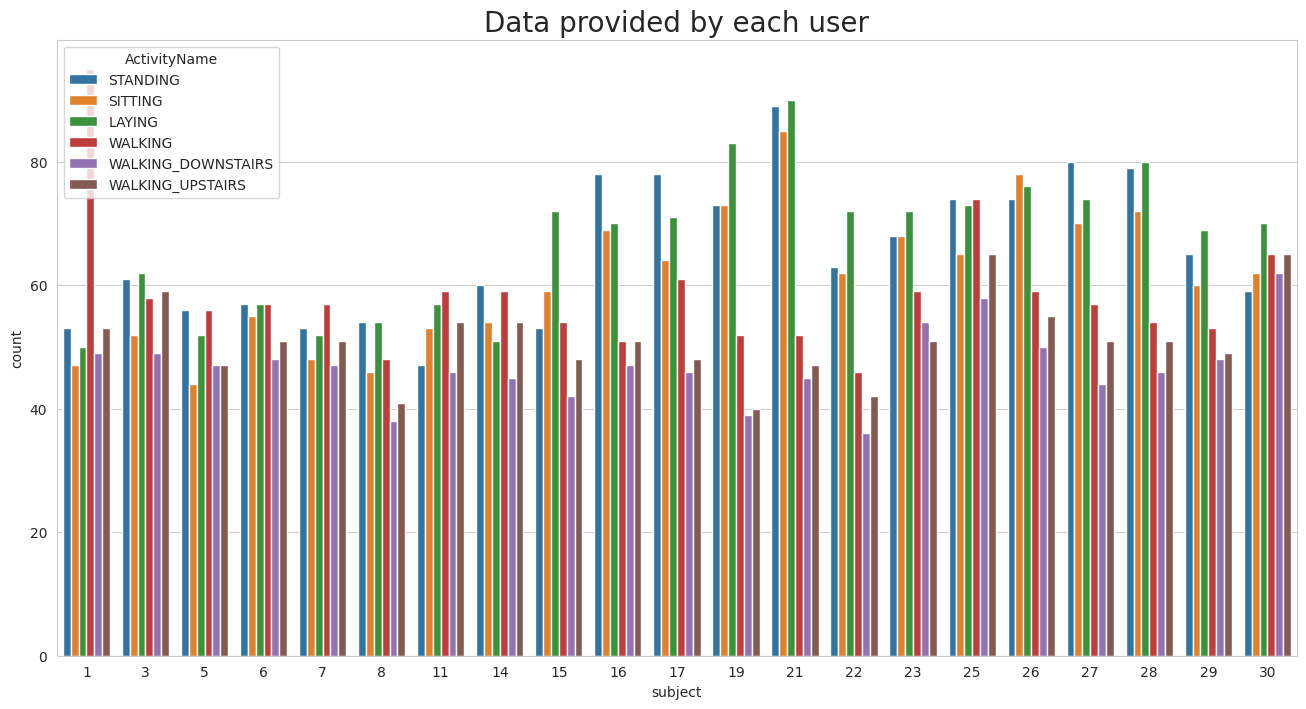

In [18]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

#### $~~~~~~~~~~~~~~~~~~~~~~~~~~$ We have got almost same number of reading from all the subjects
$~~~~~~~~~~~$

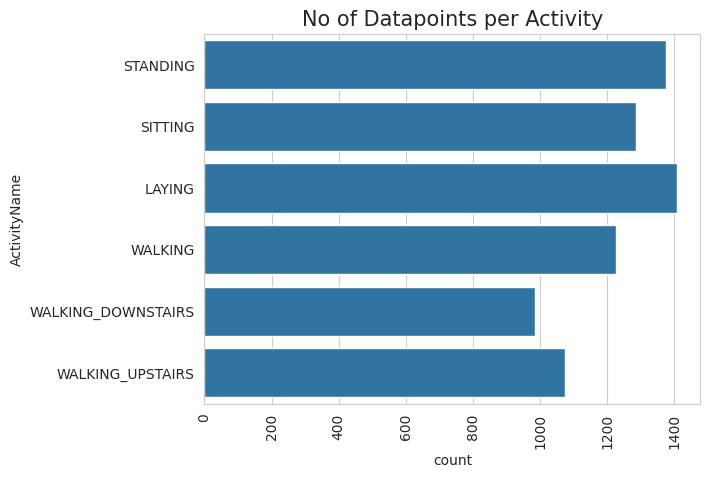

In [19]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

#### $~~~~~~~~~~~~~~~~~~~~~~~~~$Our data is well balanced (almost)
$~~~~~~~~~~~$

### 4. Changing feature names

In [20]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

### 5. Save this dataframe in a csv files

In [22]:
import os

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Now save the files
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)


train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)